In [ ]:
# library
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
# data
housing = fetch_california_housing()

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [ ]:
# standardize
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
#divide full training set to training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
# sequential API
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(1000, activation=tf.nn.relu), 
     tf.keras.layers.Dense(1000, activation=tf.nn.relu),
     tf.keras.layers.Dense(1)
     
  ]) # softmax is designed for multi-class classification

In [ ]:
# compile
model.compile(
    loss='mean_squared_error',
    optimizer='sgd'
)

In [ ]:
# fit the model
history = model.fit(
    X_train, y_train, epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 [==============================] - 4s 9ms/step - loss: 0.8345 - val_loss: 0.4881
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4250 - val_loss: 0.4072
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3963 - val_loss: 0.3780
Epoch 4/20
363/363 [==============================] - 5s 13ms/step - loss: 0.3647 - val_loss: 0.3688
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3522 - val_loss: 0.3553
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3431 - val_loss: 0.3803
Epoch 7/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3382 - val_loss: 0.3470
Epoch 8/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3313 - val_loss: 0.3429
Epoch 9/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3277 - val_loss: 0.3397
Epoch 10/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3202 - val_loss: 0.326

In [ ]:
# compute test set error
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.3392


0.3392326235771179

In [ ]:
# get an arbitrary new observation
X_new = X_test[:3]

In [ ]:
# predict using arbitrar X defined above
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 38ms/step


In [ ]:
# check outcome
y_pred

array([[2.3410208],
       [2.1592302],
       [1.2937293]], dtype=float32)

In [ ]:
print(X_train.shape)
print(X_train.shape[1:])

(11610, 8)
(8,)


#### Performance

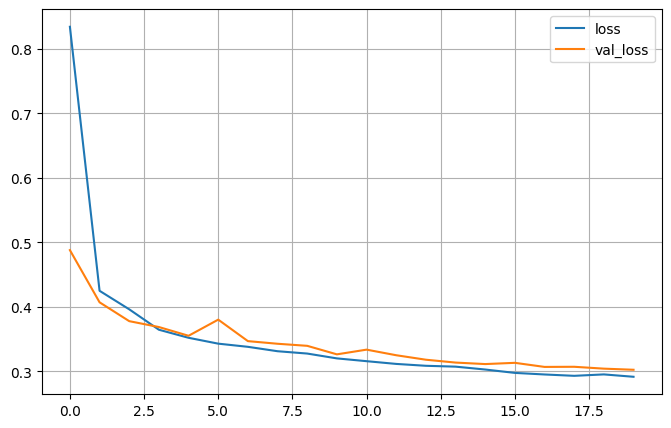

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# plot training and validating performance
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()